1. Завантаження датасету

In [ ]:
import tensorflow as tf

# Завантаження даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


2. Роздрукувати 10 зображень
Використаємо matplotlib для візуалізації перших десяти зображень:

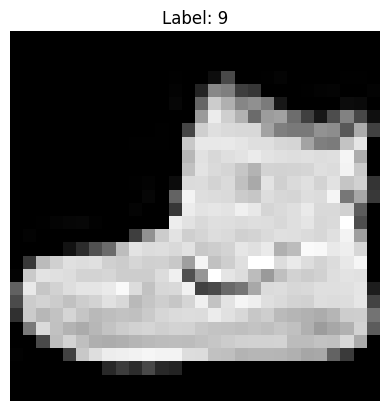

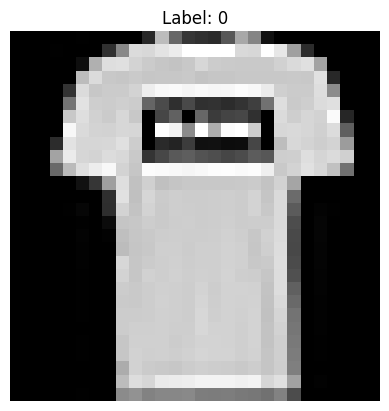

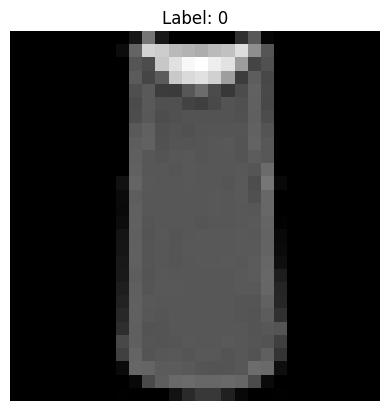

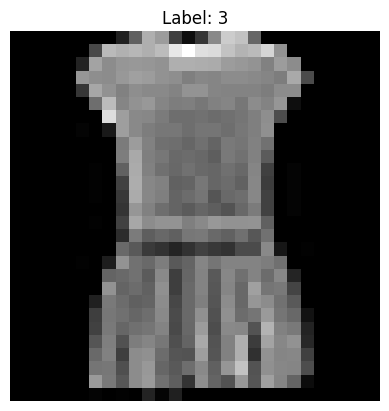

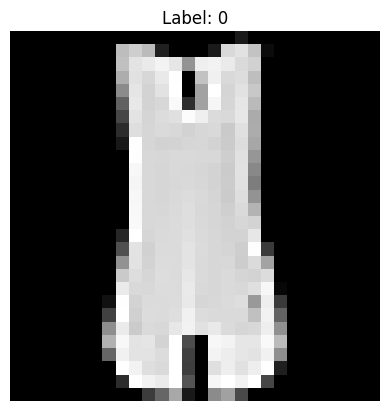

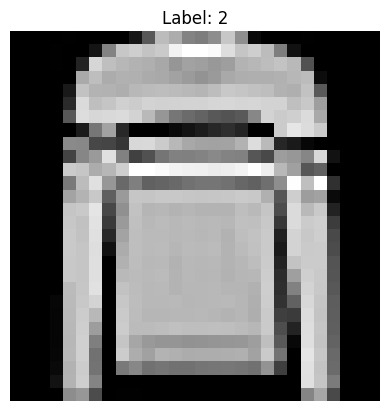

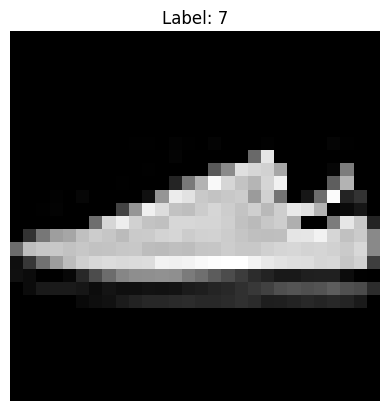

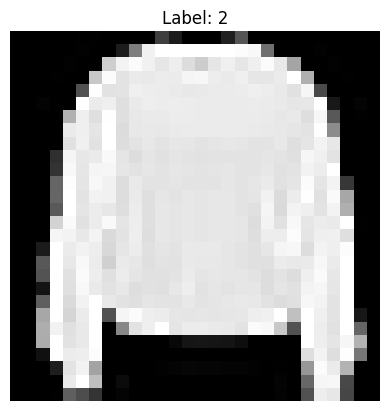

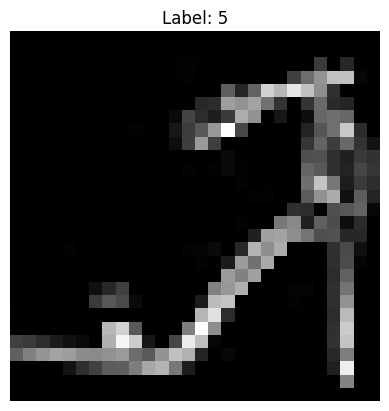

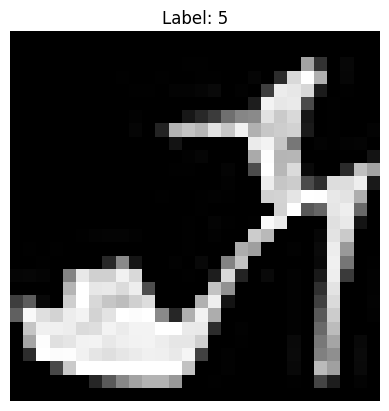

In [ ]:
import matplotlib.pyplot as plt

# Відображення перших 10 зображень
for i in range(10):
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    plt.show()

3. Підготовка даних та побудова архітектури
Перед навчанням необхідно підготувати дані:

In [ ]:
# Нормалізація даних
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Додавання виміру каналу
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Побудова моделі
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Використання ранньої зупинки та зменшення швидкості
Додамо колбеки для контролю перенавчання:

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

5. Виведення архітектури моделі
Виведемо архітектуру моделі:

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
6. Збереження моделі на Google Drive
Збережемо модель у Google Drive:

In [ ]:
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

7. Графіки функції втрат і точності
Після навчання моделі побудуємо графіки:

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7998 - loss: 0.5629 - val_accuracy: 0.8843 - val_loss: 0.3205
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.8965 - loss: 0.2878 - val_accuracy: 0.9003 - val_loss: 0.2817
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9144 - loss: 0.2298 - val_accuracy: 0.9071 - val_loss: 0.2562
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9287 - loss: 0.1954 - val_accuracy: 0.9126 - val_loss: 0.2512
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9392 - loss: 0.1662 - val_accuracy: 0.9127 - val_loss: 0.2461
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9486 - loss: 0.1385 - val_accuracy: 0.9142 - val_loss: 0.2558
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9588 - loss: 0.1152 - val_accuracy: 0.9124 - val_loss: 0.2675
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9637 -

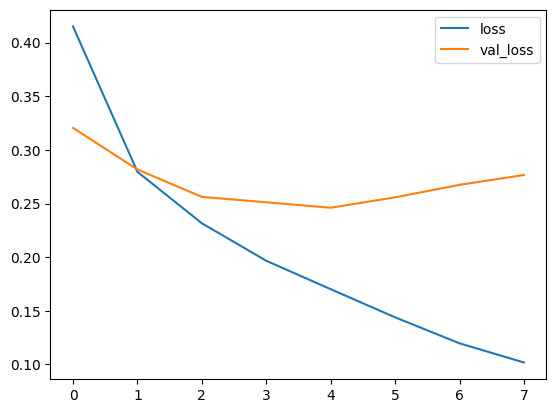

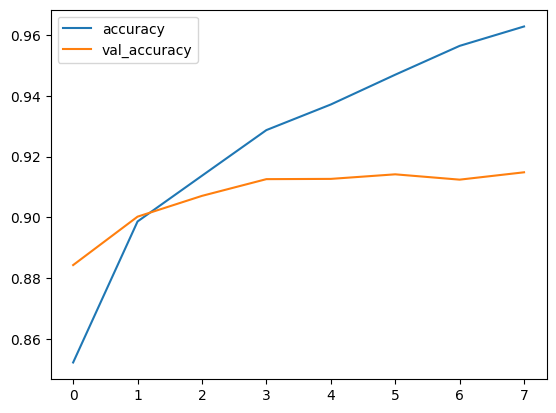

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Графік втрат
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Графік точності
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

8. Класифікаційний звіт
Для отримання класифікаційного звіту використаємо classification_report з sklearn:

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.86      0.87      1000
           3       0.88      0.95      0.91      1000
           4       0.86      0.87      0.87      1000
           5       0.97      0.99      0.98      1000
           6       0.77      0.76      0.76      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



9. Результати розпізнавання із прогнозованим і справжнім класом
Виведемо результати розпізнавання:

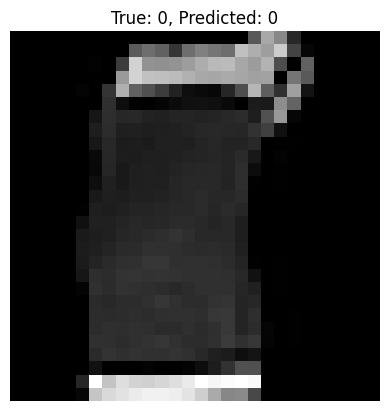

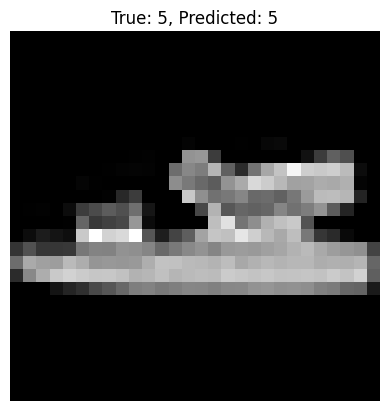

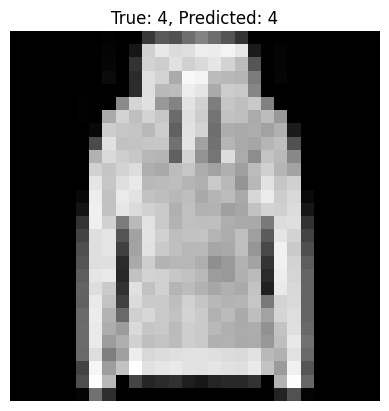

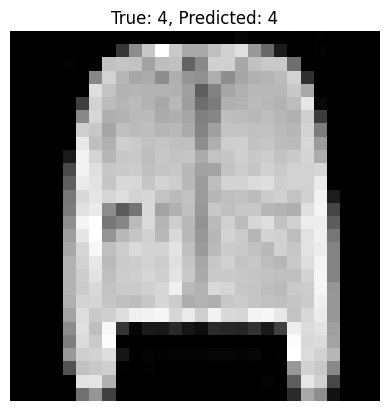

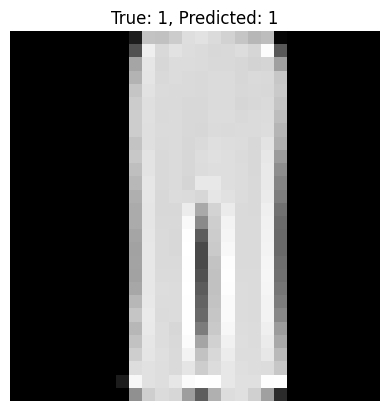

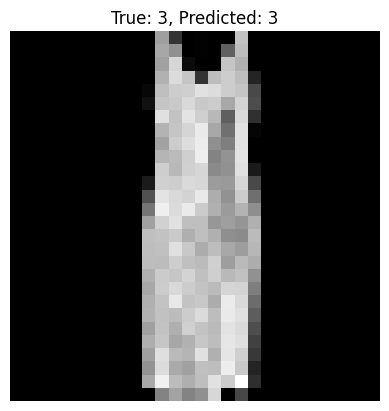

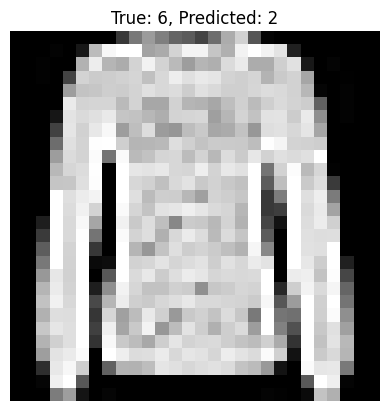

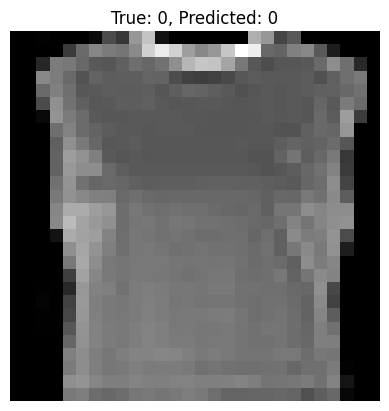

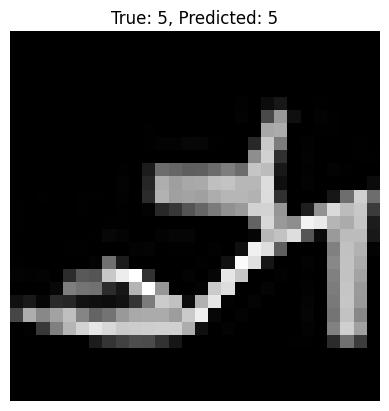

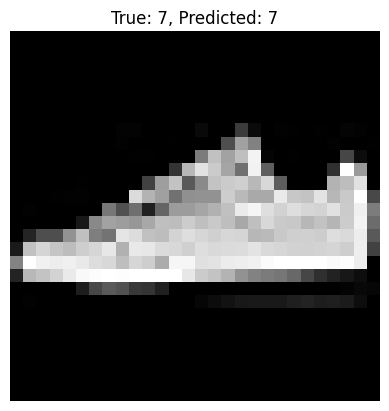

In [ ]:
import random

for _ in range(10):
    index = random.randint(0, len(x_test) - 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[index]}, Predicted: {y_pred_classes[index]}')
    plt.axis('off')
    plt.show()

Завдання 2: Використання Keras Tuner для підбору гіперпараметрів
Для другого завдання скористаємося Keras Tuner для оптимізації гіперпараметрів.
Приклад використання Keras Tuner

In [ ]:
from kerastuner import HyperModel, RandomSearch

class FashionMNISTHyperModel(HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv2D(hp.Int('filters', min_value=32, max_value=128, step=32), (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(hp.Int('units', min_value=64, max_value=256, step=64), activation='relu'))
        model.add(tf.keras.layers.Dense(10, activation='softmax'))

        model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

tuner = RandomSearch(FashionMNISTHyperModel(), objective='val_accuracy', max_trials=5)
tuner.search(x_train, y_train, epochs=10, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 22m 02s]
val_accuracy: 0.8995000123977661

Best val_accuracy So Far: 0.9152500033378601
Total elapsed time: 01h 23m 07s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
